In [1]:
!pip install rich

     |████████████████████████████████| 180 kB 2.0 MB/s eta 0:00:01
     |████████████████████████████████| 51 kB 6.0 MB/s eta 0:00:011


In [2]:
import pandas as pd
import numpy as np
import platform
import matplotlib.pyplot as plt
from rich.console import Console
from rich.progress import track

from bs4 import BeautifulSoup
from urllib.request import urlopen, Request
import requests
import urllib
import time

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
from konlpy.tag import Okt; t = Okt()

from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

Output()

1609135043.064606  : get link information from naver.
Complete! Link counts :  10


Output()

1609135043.343125  : get text information from link.
1609135044.218621  : get text information from link.
1609135045.113346  : get text information from link.
1609135045.998614  : get text information from link.
1609135047.003159  : get text information from link.
1609135047.914786  : get text information from link.
1609135048.922857  : get text information from link.
1609135049.8928168  : get text information from link.
1609135050.815818  : get text information from link.
1609135051.773967  : get text information from link.
Complete! Text counts :  42
         안녕하세요~ 크리스마스 선물이 고민이시군여 ㅎㅎ 저도 연말에는 소중한 분들께 감사인사를 전하고 싶은 마음에 크리스마스 선물을 찾아보게 되더라구요. 상품권이나 현금 그 사람한테 필요해보이는 걸 사서 드리곤 했는데요. 이번에는 직접 나가서 사기도 부담스러운 상황이라 나가서 먼가 고르기도 애~매 하더라구요. 그래서 저도 나름 고민이 많았습니다:: 그래서 이번에는 좀 다른 선물을 해보자 ! 하는 마음에 이벤트용 크리스마스 선물을 찾아봤는데 좋은 것들이 많더라구요. 인터넷 찾아보면 정말 다양한 이벤트 선물이 많잖아요. 쥬얼리도 있고 겨울용품으로 목도리, 장갑등이 보편적이더라구요. 그 중에서 제 눈에 띤게 매직 머그컵입니다. 이게 연말 선물로 특별하니 좋겠더라구요. 뜨거운 물을 부으면 내가 커스터마이징한 사진이나 글이 뾰로롱 나타납니다! 들어가보시면 아실텐데, 신기합니다! 

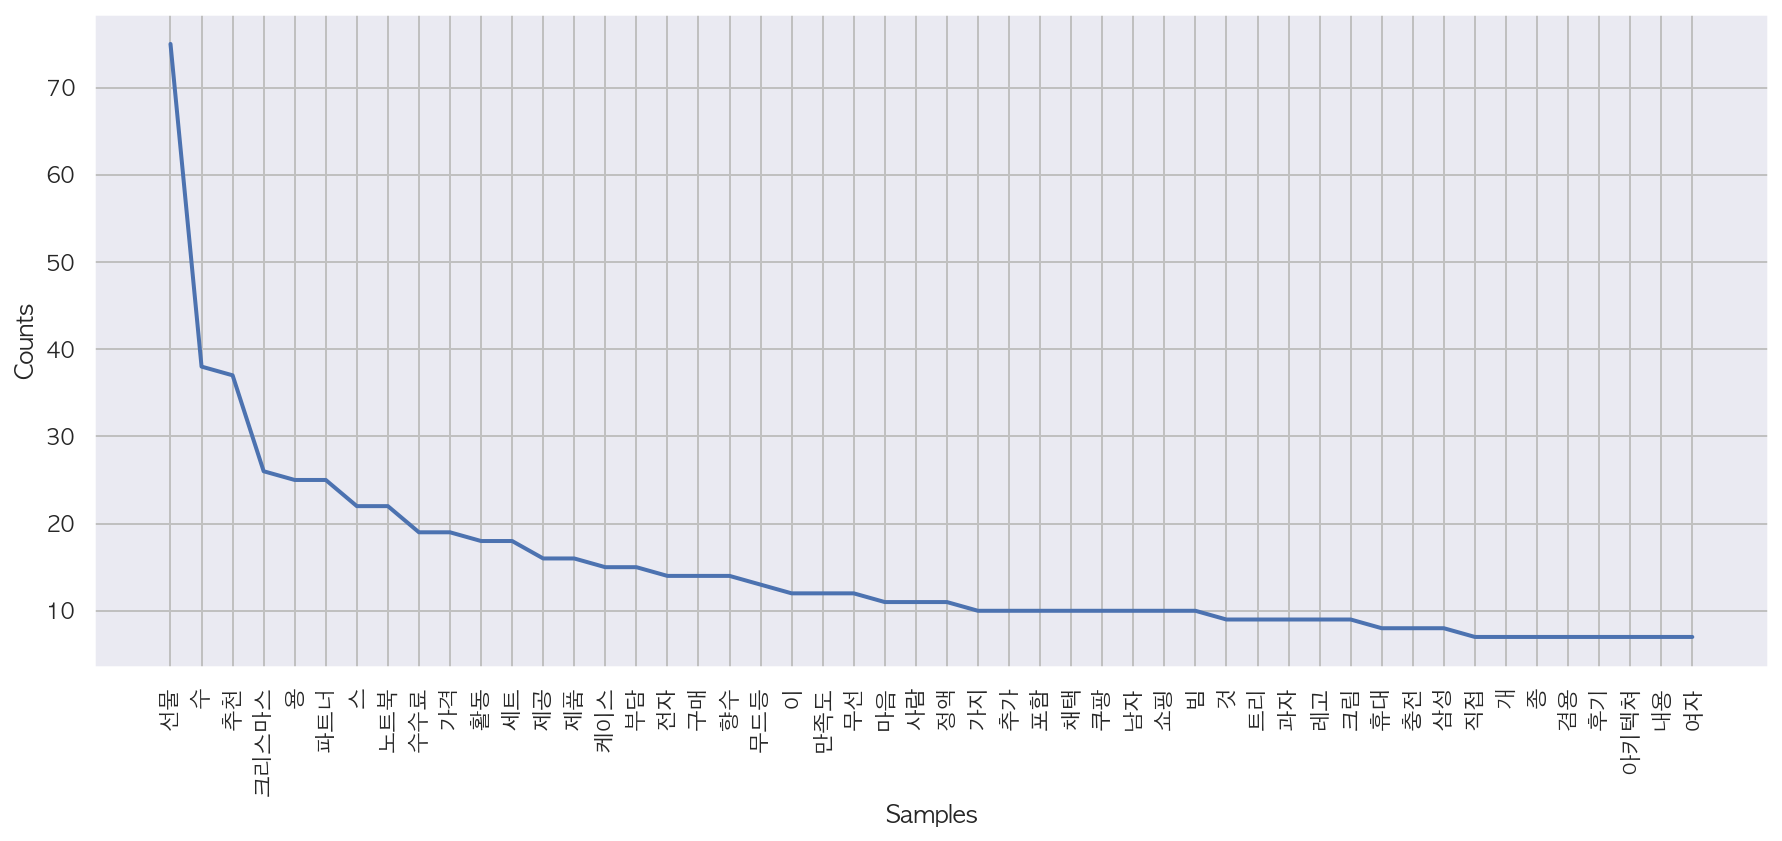

<Figure size 432x288 with 0 Axes>

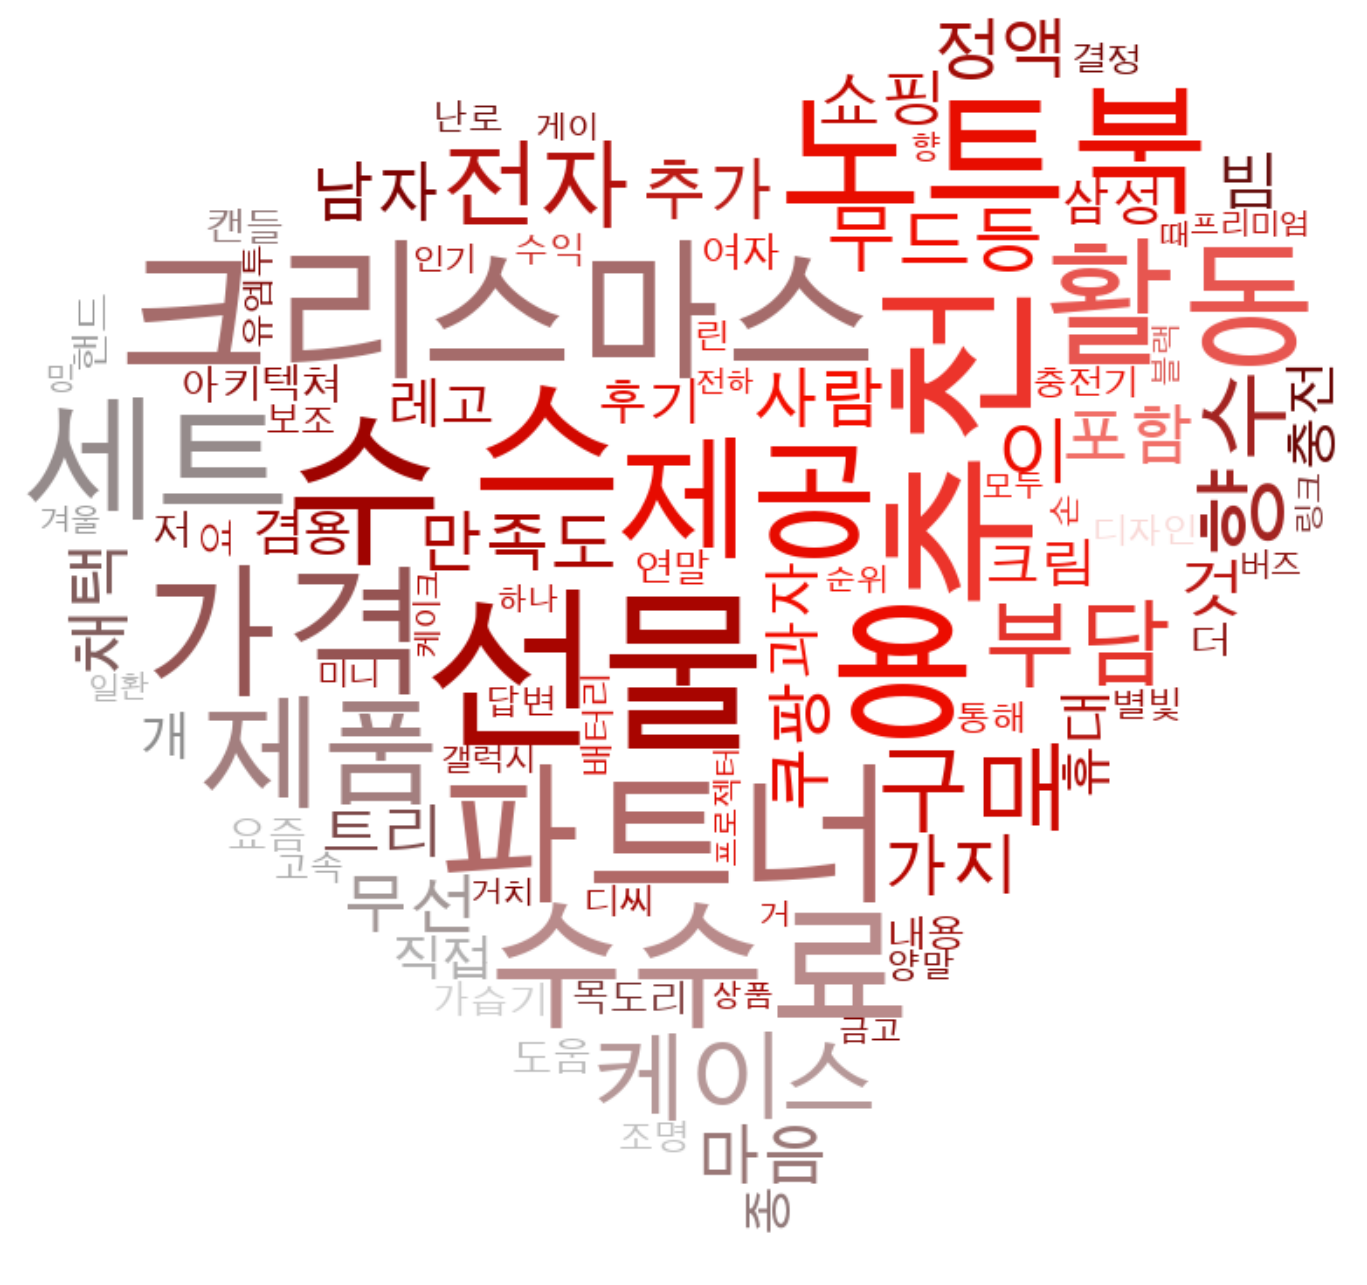

In [18]:
class SearchNaverKIN:
    def __init__(self, keyword, page_num):
        self.html = 'http://kin.naver.com/search/list.nhn?query={key_word}&page={num}'
        self.keyword = keyword
        self.page_num = page_num + 1
        self.total_link = []
        self.present_candi_text = []
        self.present_text = ''
        self.stop_words = []
        
    def get_links_onpage(self, num):
        req = Request(self.html.format(num=num, key_word=urllib.parse.quote(self.keyword)))
        req.add_header('Referer', 'http://www.naver.com/')
        response = urlopen(req)
        soup = BeautifulSoup(response, 'html.parser')
        return soup.find_all('dt')
    
    def get_total_link(self):
        for num in track(range(1, self.page_num)):
            self.total_link.extend(self.get_links_onpage(num))
            print(time.time(), ' : get link information from naver.')
        print('Complete! Link counts : ', len(self.total_link))
        
    def get_tag_text_from_links(self):
        for each_link in track(self.total_link):
            r = requests.get(each_link.a['href'])
            soup_tmp = BeautifulSoup(r.text, 'html.parser')
            search_result = soup_tmp.find_all('div', '_endContentsText')
            print(time.time(), ' : get text information from link.')
            time.sleep(0.5)
            
            for each in search_result:
                self.present_candi_text.append(each.get_text())
            
        tmp_text = ''
        for each_line in self.present_candi_text:
            tmp_text = tmp_text + each_line + '\n'
            
        self.present_text = tmp_text
        
        print('Complete! Text counts : ', len(self.present_candi_text))
        
        
    def convert_nltk(self):
        tokens_ko = t.nouns(self.present_text)
        tokens_kp = [each_word for each_word in tokens_ko
                    if each_word not in self.stop_words]
        return nltk.Text(tokens_ko)
    
    def most_common(self, n):
        ko = self.convert_nltk()
        return ko.vocab().most_common(n)
    
    def save_most_common_words(self, n):
        ko = self.convert_nltk()
        plt.figure(figsize=(15,6))
        ko.plot(n)
        plt.savefig('most_common_words.png', dpi=300)
        
    def save_word_cloud(self, n):
        data = self.most_common(n)
        
        mask = np.array(Image.open('./Downloads/09. heart.jpg'))
        image_colors = ImageColorGenerator(mask)
        
        
        wordcloud = WordCloud(font_path='/Library/Fonts/Arial Unicode.ttf',
                relative_scaling = 0.1, mask=mask,
                background_color='white',
                min_font_size=1,
                max_font_size=100).generate_from_frequencies(dict(data))

        default_colors = wordcloud.to_array()
        
        plt.figure(figsize=(12,12))
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation='bilinear')
        plt.axis('off')
        plt.savefig('word_cloud.png', dpi=300)
        
if __name__ == "__main__":
    tmp = SearchNaverKIN('크리스마스 선물', 1)
    tmp.get_total_link()
    tmp.get_tag_text_from_links()
    print(tmp.present_text)
    tmp.stop_words = ['한', '수', '은', '들', '!', '도', '이', '트', '을', '에', ',', '.', '~', '는',
              '것', '때', '제', '요', '해', '분', '만큼', '점', '때문', '더', '줄', '린']
    
    print(tmp.most_common(10))
    tmp.save_most_common_words(50)
    tmp.save_word_cloud(100)